***Decision Tree Classification***

In [131]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [105]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [17]:
clf= DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
y_pred = clf.predict(x_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


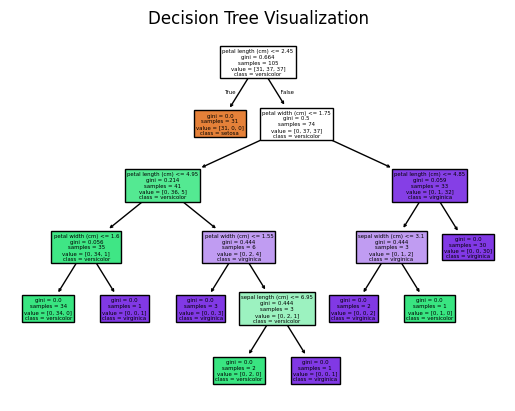

In [29]:
plt.figure(figure=(20,10))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names = iris.target_names, filled= True)
plt.title('Decision Tree Visualization')
plt.show()

In [32]:
user_defined_values =np.array([[5.1, 3.5, 1.4, 0.2],
                               [6.2, 3.4,5.4,2.3]])
pred = clf.predict(user_defined_values)
print('Predictions for user-defined values:', pred)
print('Predicted classes:', iris.target_names[pred])

Predictions for user-defined values: [0 2]
Predicted classes: ['setosa' 'virginica']


***Decision Tree Regression***

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

In [35]:
data= pd.read_csv('iris (3).csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [36]:
data.drop(columns=['Id','Species'],inplace= True)

In [37]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [38]:
x = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm']]
y = data['PetalWidthCm']

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [76]:
#pre-prunning
#regressor = DecisionTreeRegressor()
regressor = DecisionTreeRegressor()

regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [77]:
y_pred = regressor.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
mse

np.float64(0.07155555555555557)

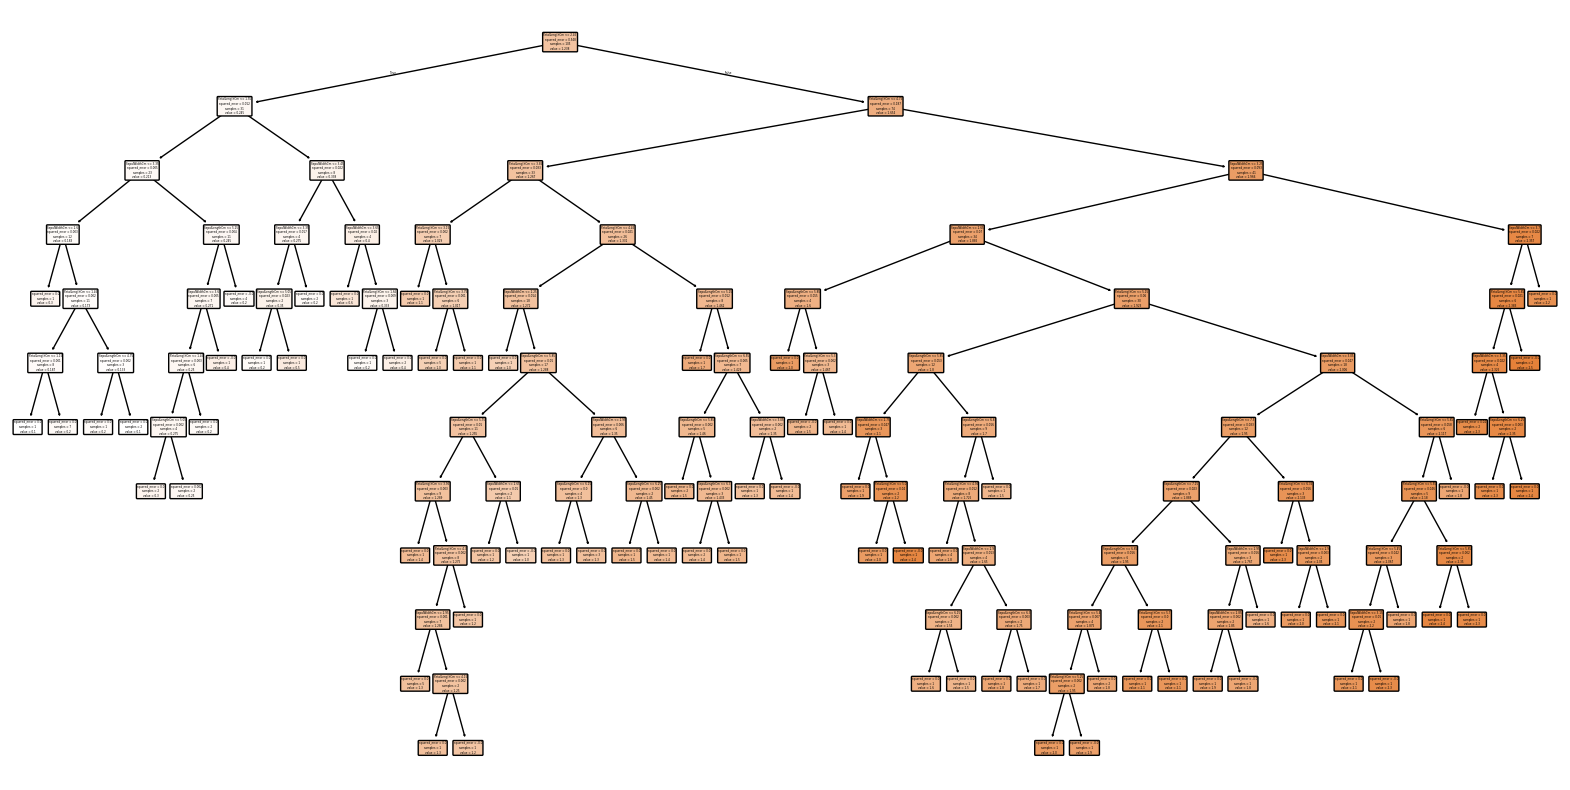

In [78]:
plt.figure(figsize=(20,10))
plot_tree(regressor, feature_names=x.columns, filled=True, rounded=True)
plt.show()
           

user_input= np.array([[5.1,3.5,1.4]])
predicted_petal_width= regressor.predict(user_input)
predicted_petal_width[0]

using ridge

In [79]:
#now using ridge
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [48]:
ridge_reg = Ridge(alpha= 1.0)
ridge_reg.fit(x_train, y_train)

Ridge()

In [51]:
y_pred = ridge_reg.predict(x_test)
mse2 = mean_squared_error(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred)


In [52]:
print('Ridge Regression :')
print('Mean error on test set: ', mse2)


Ridge Regression :
Mean error on test set:  0.036509619072911434


***pruning****

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [132]:
#pre-prunning
tree1= DecisionTreeClassifier(max_depth=2,random_state=42)
tree1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [133]:
#for post-prunning
tree2= DecisionTreeClassifier(ccp_alpha=0.01,random_state=42)
tree2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

In [142]:
y_pred = tree1.predict(x_test)
y_pred2 = tree2.predict(x_test)

y_predt = tree1.predict(x_train)
y_pred2t = tree2.predict(x_train)

In [143]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

accuracy2 = accuracy_score(y_test, y_pred2)
print('Accuracy2:', accuracy2)

accuracy_train = accuracy_score(y_train, y_predt)
print('Accuracy_train:', accuracy_train)

accuracy2_train = accuracy_score(y_train, y_pred2t)
print('Accuracy2_train:', accuracy2_train)

Accuracy: 0.9777777777777777
Accuracy2: 1.0
Accuracy_train: 0.9428571428571428
Accuracy2_train: 0.9904761904761905


In [144]:
#comparing accuracy of logistic regression and decision tree
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=200)
model.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [145]:
y_pre=model.predict(x_test)

In [146]:
accuracy=accuracy_score(y_test,y_pred)
print('Acurracy',accuracy)

Acurracy 0.9777777777777777
